---
# Project 2 : Ames Housing Data and Kaggle Challenge

---
## Part II. Pre-processing & Feature Engineering
---
Based on the EDA of features in the data set while also trying to avoid selecting features that seem redundant and thus co-linear, this section involves creating dummy columns for categorical variables as well as other relevant columns that will be used in creating the predictive model for sales price. At the end of the section, both the test and training data set will only include the features that will be used to fine tune and evaluate a model.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in 'clean' datasets (i.e. no nulls and with their columns renamed).
df = pd.read_csv('../datasets/train_clean.csv')
test_df = pd.read_csv ('../datasets/test_clean.csv')

### Create Age Column

Create column for age of house when sold, by substracting the 'year_built' column from the 'year_sold' column.

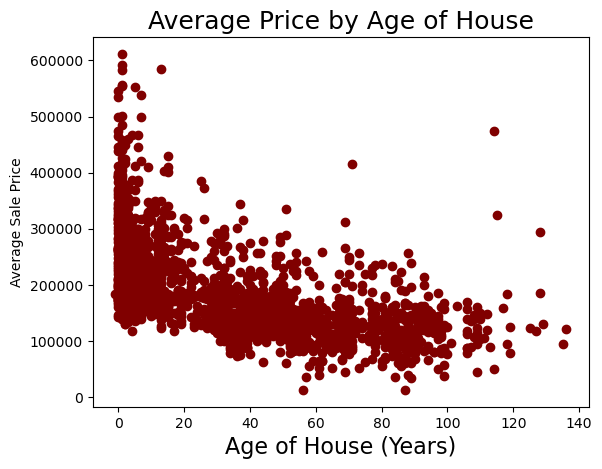

In [3]:
df['age']= df['yr_sold'] - df['year_built']
# Add the age column to the test data set as well.
test_df['age']= test_df['yr_sold'] - test_df['year_built']
plt.scatter(df['age'], df['saleprice'], color = 'maroon');
plt.title("Average Price by Age of House", size = 18);
plt.xlabel('Age of House (Years)', size = 16);
plt.ylabel('Average Sale Price');

The age of the house when sold seems to be negatively correlated with the sale price according to the scatter plot above.

### Create 'not_remodeled' column

Since have a column for the year remodeled/renovated and for the year built, and the two are the same when the house has not been remodeled/renovated, can create a dummy column to examine the effect that a renovation may have on a house

In [4]:
# Substract the year built from the year remodeled, and if equal (i.e. the sum equals 0), encode as booleans 0 and 1.
df['not_remodeled'] = df['year_remod/add'] - df['year_built']
df['not_remodeled'] = df['not_remodeled'].astype(str).str.contains('0').astype(int)

In [5]:
df['not_remodeled'].describe()

count    2051.000000
mean        0.594344
std         0.491138
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: not_remodeled, dtype: float64

59.4% of houses in data set were not remodeled before selling, the other 40.6% were.

In [6]:
df.groupby(df['not_remodeled']!=0)['saleprice'].mean()

not_remodeled
False    184201.611779
True     179605.100082
Name: saleprice, dtype: float64

Mean sales price of remodeled homes is larger than those that have not been remodeled.

In [7]:
# Do the same transformation in the test dataset.
test_df['not_remodeled'] = test_df['year_remod/add'] - test_df['year_built']
test_df['not_remodeled'] = test_df['not_remodeled'].astype(str).str.contains('0').astype(int)

### Create 'building type' and 'house style' dummies

Since EDA suggested an interesting relationship between building type/house style, will be creating dummy columns for these features to be able to include the features in the model.

In [8]:
df = pd.get_dummies(df, columns = [ 'bldg_type','house_style'], drop_first = True)
# Get the same dummy columns for the test dataset.
test_df = pd.get_dummies(test_df, columns = [ 'bldg_type','house_style'], drop_first = True)

### Create 'no_pool' column.

Going to examine the effect of having a pool on the average sales price by creating a dummy variable.

In [9]:
df['no_pool'] = df['pool_qc'].str.contains('Np').astype(int)

# Examine the difference in mean sale price between houses with and without pools.
df.groupby(df['no_pool']!=0)['saleprice'].mean()

no_pool
False    210552.222222
True     181341.522037
Name: saleprice, dtype: float64

Houses with a pool seem to sell at a higher mean sale price then those without.

In [10]:
# Get the same column in test df.
test_df['no_pool'] = test_df['pool_qc'].str.contains('Np').astype(int)

### Create 'no_fireplace' column

Based on the seemingly large difference in mean sales prices between houses that have no fireplace and those that have 1 fireplace, going to create a dummy column to compare houses with 0 fireplaces and those with any number of fireplaces.

In [11]:
df['no_fireplace'] = df['fireplaces'].astype(str).str.contains('0').astype(int)
df.groupby(df['no_fireplace']!=0)['saleprice'].mean()

no_fireplace
False    219023.078021
True     142001.103000
Name: saleprice, dtype: float64

In [12]:
# Get the same column in test df.
test_df['no_fireplace'] = test_df['fireplaces'].astype(str).str.contains('0').astype(int)

### Save new columns and features:

In [13]:
df2 = df[['id','saleprice','lot_area','garage_area', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf', 'age','bldg_type_2fmCon','bldg_type_Duplex','bldg_type_Twnhs','bldg_type_TwnhsE', 'house_style_1.5Unf','house_style_1Story','house_style_2.5Fin','house_style_2.5Unf','house_style_2Story','house_style_SFoyer','house_style_SLvl','not_remodeled','no_pool','no_fireplace']].copy()

In [14]:
# Get the same columns in test data set, but without sale price column.
test_df2 = test_df[['id','lot_area','garage_area', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf', 'age','bldg_type_2fmCon','bldg_type_Duplex','bldg_type_Twnhs','bldg_type_TwnhsE', 'house_style_1.5Unf','house_style_1Story','house_style_2.5Fin','house_style_2.5Unf','house_style_2Story','house_style_SFoyer','house_style_SLvl','not_remodeled','no_pool','no_fireplace']].copy()

In [15]:
# Save new columns and features.
df2.to_csv('../datasets/train_clean.csv', index = False)
test_df2.to_csv('../datasets/test_clean.csv', index = False)

The data sets that will be used for modelling now contain just over 20 columns. 